In [16]:
import numpy as np
import matplotlib.pyplot as plt
from plot_F_E import beta_from_energy
from decimal import Decimal
%matplotlib inline

In [17]:
def return_sandia_value(E,material='Rb'):
    sandia_Rb = np.array((
[0.01,0.4606E+04,0.0000E+00,0.0000E+00, 0.0000E+00],
[0.0305,       0.1441E+04, -0.1761E+03,  0.6821E+01,  0.4470E-01 ] ,
[ 0.111,       -0.6763E+03,  0.6772E+04, -0.1372E+04,  0.7035E+02 ] ,
[ 0.3,         -0.3457E+03,  0.2591E+04,  0.1242E+04, -0.3481E+03] ,
[1.805,        0.3524E+03, -0.3194E+04,  0.1657E+05,  0.1224E+05 ] ,
[ 1.863,       -0.4025E+03,  0.1067E+05,  0.8396E+04, -0.2275E+04 ] ,
[2.065,        0.5234E+01,  0.7494E+03,  0.5033E+05, -0.4276E+05 ] ,
[15.2,        -0.2207E+01,  0.2653E+03,  0.6269E+06, -0.3163E+07 ] ,
[100.0,        0.1101E+01, -0.4280E+03,  0.6664E+06, -0.3481E+07 ] ,
[ 500.0,        0.3467E+00,  0.4515E+03,  0.3525E+06,  0.2783E+08 ] 
    ))    
    sandia_Ar = np.array((    [ 0.01,        -8.294E+04,   5.720E+03,  -1.101E+02,   6.668E-01  ] ,
 [ 0.04,        -1.401E+03,   9.577E+02,  -7.842E+01,   1.797E+00  ] ,
 [ 0.245,       -0.2244E+03,  0.1388E+04,  0.2571E+04, -0.5113E+03 ] ,
 [ 3.203,       -0.1446E+02,  0.4359E+03,  0.6578E+05, -0.7284E+05 ] ,
 [ 20.0,         0.8786E+00, -0.3001E+03,  0.7682E+05, -0.1219E+06 ] ,
 [ 100.0,        0.6779E-01, -0.2695E+02,  0.5069E+05,  0.5281E+06 ] ,
  [500.0,        0.2598E-01,  0.3454E+02,  0.1059E+05,  0.1068E+08 ] 
))

    if material=='Rb':
        sandia=sandia_Rb
    elif material=='Ar':
        sandia=sandia_Ar

    index1 = sandia.shape[0]
    index_return = index1-1
    try:
        for i in range(index1):
            if E == sandia[i,0]:
                index_return = i
            elif E>sandia[i,0] and E<sandia[i+1,0]:
                index_return = i
            elif E>sandia[-1,0]:
                index_return=index1-1
                break
            elif E<sandia[0,0]:
                index_return=0
                break
            
    except IndexError:
        pass
           
    return sandia[index_return]

In [18]:
def return_sigma_gamma_from_index(index1,energy):

    list1 = list(index1)
    sum_terms = 0.
    for i,j in enumerate(list1):
        
        sum_terms += j*pow(energy,-(i+1))         


    return sum_terms

In [19]:
#return_sigma_gamma_from_index(return_sandia_value(100),100)

In [20]:
w = np.linspace(1.e-2,10.,10000) #to be given in keV

deltaw = w[2]-w[1]
list_cross_sec=[]


In [21]:
def return_bins(E,E_max,Npoints):

    w_to_loop = np.linspace(E,E_max,Npoints) # in keV
    w_to_loop2 = np.linspace(0,E,Npoints) # in keV
        
    sum_int1 = 0.
    sum_int2 = 0.
    list_term1=[]
    list_term2=[]

    for energy in w_to_loop:
        #calculate f(E)
        f = return_sigma_gamma_from_index(return_sandia_value(energy),energy)
        beta = beta_from_energy(400000+938)[1]
        term_inside_log = 2*.511*1e3*beta*beta/((1. - beta*beta)*(energy*1e3))
        term1 = f/E * (np.log(term_inside_log) - beta*beta + 1. - (energy/E_max))#energy/Emax
        #in keV
        list_term1.append([f,beta,term_inside_log,term1])
        #multiply term1 by dE
        sum_int1 += term1*deltaw

    for energy2 in w_to_loop2:

        term2 = ((0.001/(energy))-(0.001/E_max))*f
        list_term2.append(term2)
        sum_int2 += term2*deltaw

    sum_int = sum_int1+sum_int2    
    return sum_int

In [22]:
E_max = 127.*1e6 #Emax is the kinematically maximum energy transfer
E=4.17*1e-3
Npoints = 10000

print '%.2E' % (return_bins(4.17*1e-3,E_max,Npoints) - return_bins(5*1e-3,E_max,Npoints))

4.76E+08


In [23]:
#Create bins
#w = np.linspace(1.e-2,10.,10000) #to be given in keV
#deltaw = w[2]-w[1]
#E=4.17*1e-3
#w_to_loop = np.linspace(E,E_max,Npoints) # in keV
#w_to_loop2 = np.linspace(0,E,Npoints) # in keV
list_energies=[]
for energy2 in [4.17,5,6,7,8.34,27.28,126*1e9]:
    
    list_energies.append([energy2,return_bins(energy2*1.e-3,E_max,Npoints)])


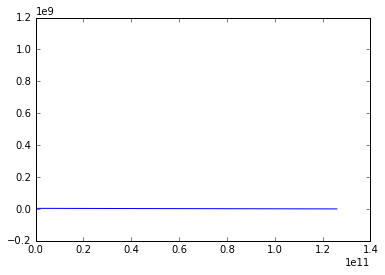

In [24]:
plt.plot(np.array(list_energies)[:,0],np.array(list_energies)[:,1])

In [30]:
print 'collisions releasing between 4.17 and 8.34 eV'
print '%.2E' % (return_bins(4.17*1.e-3,E_max,Npoints) - return_bins(8.34*1.e-3,E_max,Npoints))

print 'collisions releasing between 8.34 and 27.28 eV'
print '%.2E' % (return_bins(8.34*1.e-3,E_max,Npoints) - return_bins(27.28*1.e-3,E_max,Npoints))

print 'collisions releasing between 27.28 and E_max eV'
print '%.2E' % (return_bins(27.28*1.e-3,E_max,Npoints) - return_bins(E_max-0.000001,E_max,Npoints))

# 
#553774862027.0

# from 27.28 to 127 GeV
#5133404.9979

collisions releasing between 4.17 and 8.34 eV
9.84E+08
collisions releasing between 8.34 and 27.28 eV
1.31E+08
collisions releasing between 27.28 and E_max eV
3.57E+06
